# Saha Equation (with number density of free electrons $n_e$)

Chapter 8, Caroll and Ostlie.

$$
\frac{N_{i+1}}{N_i} = \frac{2Z_{i+1}}{n_e Z_i} (\frac{2\pi m_e kT}{h^2})^{3/2} e^{-\chi_i/kT}
$$

# Saha Equation (with electron pressure $P_e$)

$$
\frac{N_{i+1}}{N_i} = \frac{2kT Z_{i+1}}{P_e Z_i} (\frac{2\pi m_e kT}{h^2})^{3/2} e^{-\chi_i/kT}
$$

## Partition function (Z)

$$
Z = \sum^{\infty}_{j=1} g_j e^{-(E_j-E_1)/kT}
$$

$h$ is plank contant

$m_e$ is electron mass

$\chi_i$ is the ionization energy needed to remove electron from atom 

$k$ = Boltzman constant

$E_a,E_b$ are energies (typically eV)

$g_a,g_b$ are number of degenerate states (i.e. how many different quantum states are there which have the same energy) , e.g.  for hydrogen:

> $g_b = 2n^2$


In [10]:
import math
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
def saha_equation_pressure(Z_1, Z_2, k, T, P_e, m_e, chi_i, h):
    return \
    ((2 * k * T * Z_2) / (P_e * Z_1)) * \
    ((2 * math.pi * m_e * k * T) / h**2)**(3/2) * \
    math.e ** -(chi_i / (k*T))

In [12]:
def partition_function_j(g_j, E_j, E_1, k, T):
    """
    Calculate the value for one partition (j), of the partition function Z.
    Eq (8.7), Caroll and Ostlie p214.
    """
    return g_j * (math.e**(-(E_j - E_1) / (k*T)))

# Problem 8.7

In Example 8.1.4 (p215), the statement was made that:


> nearly all of the H I atoms are in the ground state, so Eq. (8.7) for the partition function simplifies to $Z_1 \simeq g_1 = 2(1)^2 = 2$

Verify that this statement is correct for a temperature of 10,000 K by evaluating the first three terms in Eq. (8.7) for the partition function.

$T = 10000K$

$k = 8.6173*10^{-16}eV s$

**So - we need to eval the Partition Function for j=[1-3]**

$$
Z = \sum^{\infty}_{j=1} g_j e^{-(E_j-E_1)/kT}
$$

$$g_n = 2n^2$$

In [13]:
g_1 = 2 * 1**2
g_2 = 2 * 2**2
g_3 = 2 * 3**2
g_1, g_2, g_3

(2, 8, 18)

#### EQ 5.13, p124
$E_n = -13.6eV \frac{1}{n^2}$

In [28]:
# ENERGY STATES
# first 2 given in Table 8.2, p212
E_1_ev = -13.6
E_2_ev = -3.4

# EQ 5.13, p124
E_3_ev = -1.51 

In [32]:
k_ev = 8.6173E-5
k = 1.3806e-23

T = 10000

Z_1 = partition_function_j(g_1, E_1_ev, E_1_ev, k_ev, T)
Z_2 = partition_function_j(g_2, E_2_ev, E_1_ev, k_ev, T)
Z_3 = partition_function_j(g_3, E_3_ev, E_1_ev, k_ev, T)

print('Z_1: %s, Z_2: %s, Z_3: %s' % (Z_1, Z_2, Z_3))

# Result is ~2, as expected.
print('TOTAL Z: %s' % (Z_1 + Z_2 + Z_3))

Z_1: 2.0, Z_2: 5.7875718512000796e-05, Z_3: 1.4526371950019856e-05
TOTAL Z: 2.000072402090462


# Problem 8.10

In this problem, you will follow a procedure similar to that of Example 8.1.4 for the case of a
stellar atmosphere composed of pure helium to find the temperature at the middle of the He I
partial ionization zone, where half of the He I atoms have been ionized. (Such an atmosphere would be found on a white dwarf of spectral type DB; see Section 16.1) 

The ionization energies of neutral helium and singly ionized helium are $\chi_I = 24.6 eV$ and $\chi_{II} = 54.4 eV$, respectively.

The partition functions are $Z_I = 1, Z_{II} = 2, Z_{III} = 1$ (as expected for any completely ionized atom). 

Use $P_e = 20 N m^{-2}$ for the electron pressure.

(a) Use Eq. (8.9) to find $N_{II}/N_I$ and $N_{III}/N_{II}$ for temperatures of 5000 K, 15,000 K, and 25,000K
How do they compare?

### Answer

$N_{II}/N_I$ - climbs rapidly from 10000K to 20000K, 50% at ~15000K, nears 100% ionization at 20000K)

$N_{III}/N_{II}$ - climbs less rapidly from 25000K to 40000K, 50% at ~32500K, nears 100% ionization at 41000K)

## REPLICATING EXAMPLE 8.1.4 p215

<AxesSubplot:xlabel='Temp'>

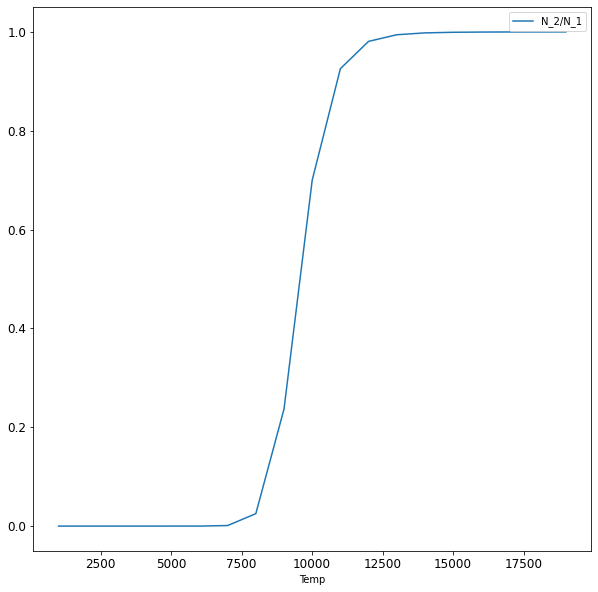

In [36]:
m_e = 9.10938215E-31 # electron mass kg
h = 6.62606896E-34   # plank constant J
k = 1.38065E-23      # boltzman constant J 

Z_1 = 2
Z_2 = 1
P_e = 20

chi_1_ev = 13.6
chi_1 = 2.17896e-18

# make a range of temps to plot
temps = list(range(1000, 20000, 1000))

 # equation gives ratio of N_2/N_1
eg_ratios = {}
for t in temps:
    eg_ratios[t] = saha_equation_pressure(Z_1, Z_2, k, t, P_e, m_e, chi_1, h)

 # convert ratio to fraction (i.e. 0-1)
eg_fracs = {}
for t in temps:
   eg_fracs[t] =  eg_ratios[t] / (1 + eg_ratios[t])


# print('5000: %s, 10000: %s, 15000: %a' % (frac1,frac2,frac3))

df = pd.DataFrame({
    'Temp': temps, 
    'N_2/N_1': list(eg_fracs.values())
})

df.plot(kind='line', x='Temp', figsize=(10,10), fontsize=12)

## Working for part A

In [43]:
# Part A, T = 5000K
k = 1.3806E-23
Z_1 = 1
Z_2 = 2
Z_3 = 1
P_e = 20

chi_1_ev = 24.6
chi_1 = 3.94135e-18

chi_2_ev = 54.4
chi_2 = 8.71584e-18

# make a range of temps to plot
temps = list(range(1000, 51000, 1000))

# ratio of N2/N1
n2_n1_ratios = {}
for t in temps:
    n2_n1_ratios[t] = saha_equation_pressure(Z_1, Z_2, k, t, P_e, m_e, chi_1, h)

# convert ratio to fraction (i.e. 0-1)
n2_n1_fracs = {}
for t in temps:
    n2_n1_fracs[t] = n2_n1_ratios[t] / (1 + n2_n1_ratios[t])

# print('n2_n1_ratios: %s' % n2_n1_ratios) 
# print('n2_n1_fracs: %s' % n2_n1_fracs)
# for t in temps:
#     print('T=%s -> %s' % (t, n2_n1_ratios[t]))

# ratio of N3/N2
n3_n2_ratios = {}
for t in temps:
    n3_n2_ratios[t] = saha_equation_pressure(Z_2, Z_3, k, t, P_e, m_e, chi_2, h)

# convert ratio to fraction (i.e. 0-1)
n3_n2_fracs = {}
for t in temps:
    n3_n2_fracs[t] = n3_n2_ratios[t] / (1 + n3_n2_ratios[t])
    
# print('n3_n2_ratios: %s' % n3_n2_ratios)
# print('n3_n2_fracs: %s' % n3_n3_fracs)
# for t in temps:
#     print('T=%s -> %s' % (t, n3_n2_fracs[t]))

In [47]:
print('\nN2/N1: 5000K: %s, 15000K: %s, 25000K: %s' % (n2_n1_ratios[5000],n2_n1_ratios[15000],n2_n1_ratios[25000]))
print('\nN3/N2: 5000K: %s, 15000K: %s, 25000K: %s' % (n3_n2_ratios[5000],n3_n2_ratios[15000],n3_n2_ratios[25000]))


N2/N1: 5000K: 1.8827806579506554e-18, 15000K: 0.996880389568512, 25000K: 7235.573580460026

N3/N2: 5000K: 4.310948550337179e-49, 15000K: 2.420252973627885e-11, 25000K: 0.001777377154226642


<AxesSubplot:xlabel='Temp'>

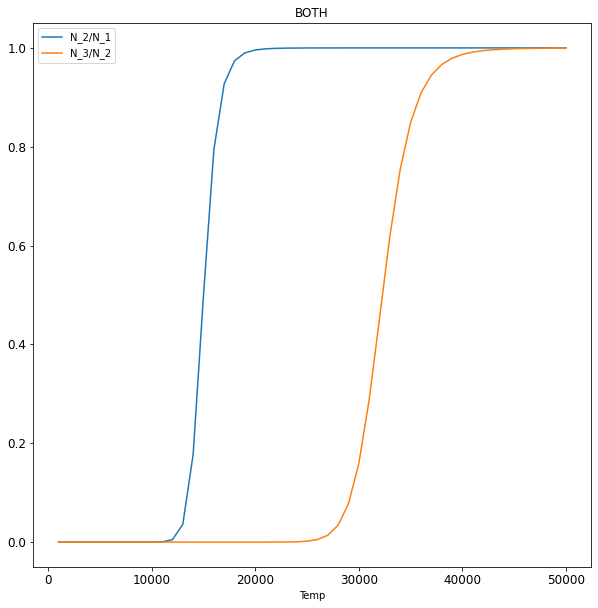

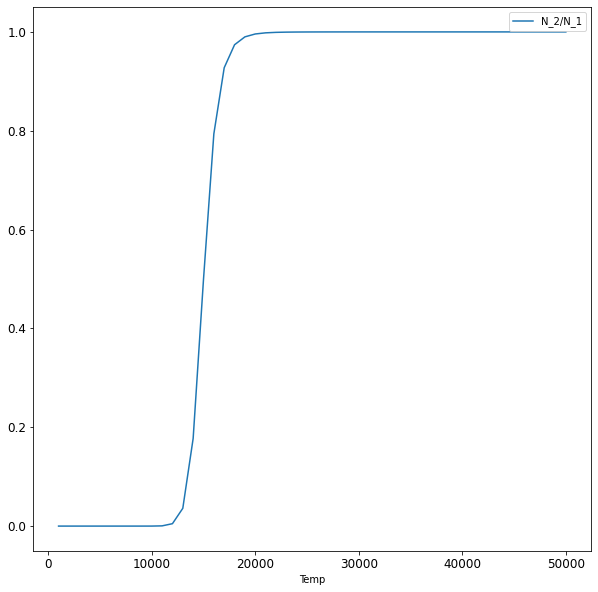

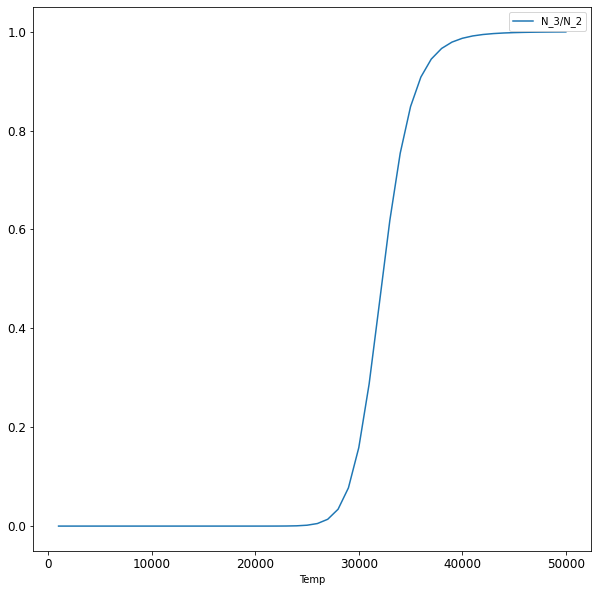

In [49]:
df = pd.DataFrame({
    'Temp': temps, 
    'N_2/N_1': list(n2_n1_fracs.values()),
    'N_3/N_2': list(n3_n2_fracs.values())
})

df.plot(title='BOTH', kind='line', x='Temp', figsize=(10,10), fontsize=12)

df.plot(kind='line', x='Temp', y='N_2/N_1', figsize=(10,10), fontsize=12)
df.plot(kind='line', x='Temp', y='N_3/N_2', figsize=(10,10), fontsize=12)

(b) Show that:

$$\frac{N_{II}}{N_{total}} = \frac{N_{II}}{(N_I+N_{II}+N_{III})}$$ 

can be expressed in terms of the ratios: $N_{II}/N_I$ and $N_{III}/N_{II}$

### Answer:

$$\frac{N_{II}}{N_{total}} = \frac{N_{II}}{(N_I+N_{II}+N_{III})} = \frac{N_2/N_1}{1 + N_2/N_1 + (N_3/N_2)(N_2/N_1)}$$ 

See also: http://dslavsk.sites.luc.edu/courses/phys380/homework/phys380-2011hw6s.pdf

(c) Make a graph of $\frac{N_{II}}{N_{total}}$ similar to Fig. 8.8 for a range of temperatures from 5000 K
to 25,000 K. 

What is the temperature at the middle of the He I partial ionization zone?
Because the temperatures of the middle of the hydrogen and He I partial ionization zones
are so similar, they are sometimes considered to be a single partial ionization zone with a
characteristic temperature of $1-1.5 *10^4K$.

## Answer

From the plot below we see temperature at the middle of the He I partial ionization zone is `15000K`

In [53]:
def nii_2_total(n2_n1, n3_n2):
    '''
    Implements $$N_2/N_{total}$$ as per answer part (b) above
    '''
    return n2_n1 / (1 + n2_n1 + n3_n2*n2_n1)

In [61]:
n_totals = []

# make a range of temps to plot
temps = list(range(5000, 26000, 1000))

for t in temps:
    ratio = nii_2_total(n2_n1_ratios[t], n3_n2_ratios[t])
    n_totals.append(ratio)

<AxesSubplot:xlabel='Temp'>

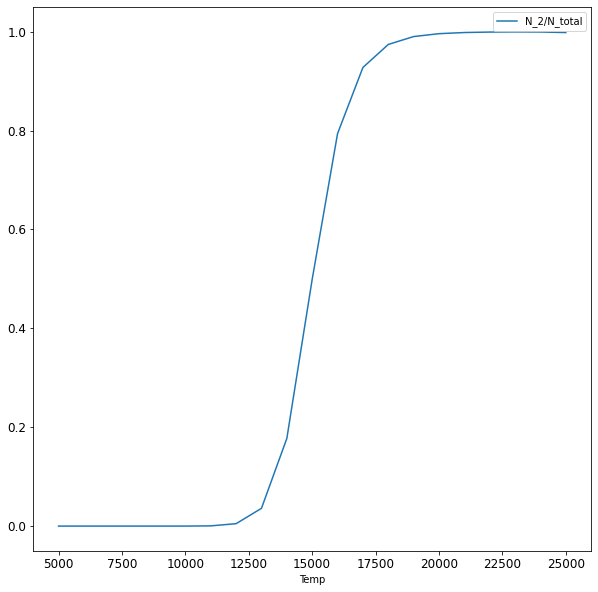

In [62]:
df = pd.DataFrame({
    'Temp': temps, 
    'N_2/N_total': n_totals
})
df.plot(kind='line', x='Temp', figsize=(10,10), fontsize=12)

In [63]:
# i = 0
# for t in temps:
#     print('T=%s -> %s' % (t, n_totals[i]))
#     i+=1

# 8.13

Use the information in Example 8.1.5 to **calculate the ratio of doubly to singly ionized calcium
atoms (Ca III/Ca II)** in the Sun's photosphere. 

The ionization energy of Ca Il is $\chi_{II} = 11.9 eV$.

Use $Z_{III} = 1$ for the partition function of Ca III. 

Is your result consistent with the statement in Example 8.1.5 that in the solar photosphere?


> nearly all of the calcium atoms are available for forming the H and K lines of calcium

In [15]:
# We need to find ca3/ca2

chi_2_ev = 11.9 # eV
chi_2 = 1.90659e-18

z_2 = 2.3 # p218
Z_3 = 1 
T = 5777
Pe = 1.5

# N3/N2
ca_ratio = saha_equation_pressure(Z_2, Z_3, k, T, Pe, m_e, chi_2, h)

# convert ratio to fraction (i.e. 0-1)
ca_frac = ca_ratio / (1 + ca_ratio)

ca_ratio, ca_frac

(0.002340453867446017, 0.002334988933566009)

## Answer

$\frac{Ca_3}{Ca_2} = 0.0023$

This implies there are very few _doubly_ ionized calcium atoms (compared to $N2/N1$, which is 918 - as shown in example 8.1.5).

If most Ca atoms are singly ionized, they are available for forming H and K lines (these lines are known to come from Ca_2).

# 8.14

Consider a giant star and a main-sequence star of the same spectral type. 

Appendix G shows that the giant star, which has a lower atmospheric density, has a slightly lower temperature than the main-sequence star. 

Use the Saha equation to explain why this is so. Note that this means that there is not a perfect correspondence between temperature and spectral type!

---

Giant = lower density and temp

Main = higher density and temp

The stars are the same SPECTRAL type, so by definition they have the same ratio of atoms in their atmosphere in specific ionisation state.

This ratio is what SAHA tells us:

$$
\frac{N_{i+1}}{N_i} = \frac{2Z_{i+1}}{n_e Z_i} (\frac{2\pi m_e kT}{h^2})^{3/2} e^{-\chi_i/kT}
$$

We can see that density ($n_e$) and Temp ($T$) are accounted for in SAHA eq. 

So when $n_e$ is lower in a giant, $T$ must also be reduced too, to maintain the same ratio of ionization.
